# Upload tables

In [1]:
import pandas as pd
import numpy as np

filenames = ["out_df_ws_jumps-250.csv","out_df_ws_jumps-200.csv","out_df_ws_jumps-150.csv",
"out_df_ws_jumps-100.csv","out_df_ws_jumps-50.csv","out_df_ws_jumps.csv",
"out_df_ws_jumps50.csv","out_df_ws_jumps100.csv","out_df_ws_jumps150.csv",
"out_df_ws_jumps200.csv","out_df_ws_jumps250.csv","out_df_ws_jumps300.csv",
"out_df_ws_jumps350.csv","out_df_ws_jumps400.csv","out_df_ws_jumps450.csv",
"out_df_ws_jumps500.csv","out_df_ws_jumps550.csv","out_df_ws_jumps600.csv",
"out_df_ws_jumps650.csv","out_df_ws_jumps700.csv","out_df_ws_jumps750.csv",
"out_df_ws_jumps800.csv","out_df_ws_jumps850.csv","out_df_ws_jumps900.csv",
"out_df_ws_jumps950.csv","out_df_ws_jumps1000.csv","out_df_ws_jumps1050.csv",
"out_df_ws_jumps1100.csv","out_df_ws_jumps1150.csv","out_df_ws_jumps1200.csv",
"out_df_ws_jumps1250.csv","out_df_ws_jumps1300.csv","out_df_ws_jumps1350.csv",
"out_df_ws_jumps1400.csv","out_df_ws_jumps1450.csv","out_df_ws_jumps1500.csv"]

filenames_shuff = ["out_df_shuff_1.csv", "out_df_shuff_2.csv", "out_df_shuff_3.csv",
"out_df_shuff_4.csv", "out_df_shuff_5.csv", "out_df_shuff_6.csv", "out_df_shuff_7.csv",
"out_df_shuff_8.csv", "out_df_shuff_9.csv", "out_df_shuff_10.csv"]

dirs = "inputcsv"

pieces = []
for f in filenames:
    pieces.append(pd.read_csv(f"../{dirs}/{f}"))

for f in filenames_shuff:
    pieces.append(pd.read_csv(f"../{dirs}/{f}"))
    
piece_out = pd.read_csv(f"../{dirs}/out_df_ws_jumps.csv")

In [2]:
def l_and_r_2_both(df_in):
    df_in["DNA"] = df_in["DNA_l"] + df_in["DNA_r"]
    df_in["LINE"] = df_in["LINE_l"] + df_in["LINE_r"]
    df_in["LTR"] = df_in["LTR_l"] + df_in["LTR_r"]
    df_in["SINE"] = df_in["SINE_l"] + df_in["SINE_r"]
    df_in["Low_complexity"] = df_in["Low_complexity_l"] + df_in["Low_complexity_r"]
    df_in["Retroposon"] = df_in["Retroposon_l"] + df_in["Retroposon_r"]
    df_in["Satellite"] = df_in["Satellite_l"] + df_in["Satellite_r"]
    df_in["Simple_repeat"] = df_in["Simple_repeat_l"] + df_in["Simple_repeat_r"]
    df_in["rRNA"] = df_in["rRNA_l"] + df_in["rRNA_r"]
    df_in["snRNA"] = df_in["snRNA_l"] + df_in["snRNA_r"]
    df_in["scRNA"] = df_in["scRNA_l"] + df_in["scRNA_r"]
    df_in["srpRNA"] = df_in["srpRNA_l"] + df_in["srpRNA_r"]
    df_in["tRNA"] = df_in["tRNA_l"] + df_in["tRNA_r"]
    df_in["RC"] = df_in["RC_l"] + df_in["RC_r"]
    
    df_in["L1"] = df_in["L1_s_l"] + df_in["L1_s_r"]
    df_in["L2"] = df_in["L2_s_l"] + df_in["L2_s_r"]
    df_in["MIR"] = df_in["MIR_s_l"] + df_in["MIR_s_r"]
    df_in["Alu"] = df_in["Alu_s_l"] + df_in["Alu_s_r"]
    df_in["Real_satellite"] = df_in["Satellite_s_l"] + df_in["Satellite_s_r"]
    
    df_in["CG_frac"] = df_in[["CG_frac_l", "CG_frac_r"]].apply(lambda x: np.mean(x) if min(x)>=0 else max(x), axis=1)
    df_in["telocent_dist"] = df_in[["telo", "centro"]].apply(min, axis=1)
    
    df_in = df_in.drop(['DNA_l', 'LINE_l', 'LTR_l', 'SINE_l', 'Low_complexity_l', 'Retroposon_l', 'Satellite_l',
       'Simple_repeat_l', 'rRNA_l', 'snRNA_l', 'scRNA_l', 'srpRNA_l', 'tRNA_l',
       'RC_l', 'DNA_r', 'LINE_r', 'LTR_r', 'SINE_r', 'Low_complexity_r',
       'Retroposon_r', 'Satellite_r', 'Simple_repeat_r', 'rRNA_r', 'snRNA_r',
       'scRNA_r', 'srpRNA_r', 'tRNA_r', 'RC_r'], axis=1)
    df_in = df_in.drop(['L1_s_l', 'L2_s_l', 'MIR_s_l',
       'Alu_s_l', 'Satellite_s_l', 'L1_s_r', 'L2_s_r', 'MIR_s_r',
       'Alu_s_r', 'Satellite_s_r'], axis=1)
    df_in = df_in.drop(['CG_frac_l', 'CG_frac_r'], axis=1)
    df_in = df_in.drop(['used_coor_l_s', 'used_coor_l_e', 'used_coor_r_s', 'used_coor_r_e'], axis=1)
    df_in = df_in.drop(['repli_vari'], axis=1)
    return df_in
    
for p in pieces:
    p = l_and_r_2_both(p)
    
piece_out = l_and_r_2_both(piece_out)

In [3]:
pd.set_option('display.max_columns', None)
piece_out

,chr,coor_s,coor_e,ids,jumps,length,centro,telo,gaps,genes,intra_frac,cpgisl_in,cpgisl_bor,ctcf,repli_in,repli_bor,repli_bor_deriv,repli_deriv,recomb_in,recomb_bor,dnase_in,dnase_bor,CG_frac_in,DNA,LINE,LTR,SINE,Low_complexity,Retroposon,Satellite,Simple_repeat,rRNA,snRNA,scRNA,srpRNA,tRNA,RC,L1,L2,MIR,Alu,Real_satellite,CG_frac,telocent_dist
0,1,10000,207666,id1,3,197666,121818793,0,2,6,0.206,3,0,0,23.697,21.098,0.0,31.000,1.306,1.306,18.837,39.412,0.444,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0000,0
1,1,257666,297956,id2,3,40290,121728503,247666,2,0,0.208,0,0,0,29.531,21.098,0.0,13.000,1.306,1.306,29.449,39.412,0.391,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.5380,247666
2,1,347968,535988,id3,1,188020,121490471,337968,2,1,0.229,3,0,0,20.982,21.098,0.0,3.885,1.306,1.306,31.596,39.412,0.430,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0000,337968
3,1,585988,817292,id4,4,231304,121209167,575988,1,2,0.255,3,0,0,20.347,28.000,0.0,43.000,1.306,1.306,370.261,39.412,0.428,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.4120,575988
4,1,817367,821400,id5,1,4033,121205059,807367,0,1,0.000,0,0,0,29.000,28.500,1.0,2.000,1.306,1.306,14.195,6.290,0.510,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.4605,807367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6651,22,48911634,48912886,id4359,1,1252,33857316,1895582,0,0,1.000,0,0,0,3.000,3.000,0.0,3.885,2.425,2.425,9.797,9.110,0.468,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.4705,1895582
6652,22,49383944,49385910,id4360,1,1966,34329626,1422558,0,0,1.000,0,0,0,2.000,2.000,0.0,3.885,2.425,2.425,6.030,6.030,0.393,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.4510,1422558
6653,22,49386637,49388496,id4361,1,1859,34332319,1419972,0,0,1.000,0,0,0,2.000,2.000,0.0,3.885,2.425,2.425,31.596,39.412,0.397,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.3530,1419972
6654,22,50432257,50442552,id4362,2,10295,35377939,365916,0,1,1.000,2,0,0,1.545,1.500,0.0,1.000,1.306,1.306,10.048,39.412,0.648,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.5880,365916


In [4]:
print(np.sum(piece_out.iloc[:, 23:42], axis=0))

DNA                391
LINE              2612
LTR               1154
SINE              2626
Low_complexity     128
Retroposon          58
Satellite          193
Simple_repeat      945
rRNA                 7
snRNA               10
scRNA                0
srpRNA               3
tRNA                 1
RC                   0
L1                2308
L2                 258
MIR                301
Alu               2323
Real_satellite      91
dtype: int64


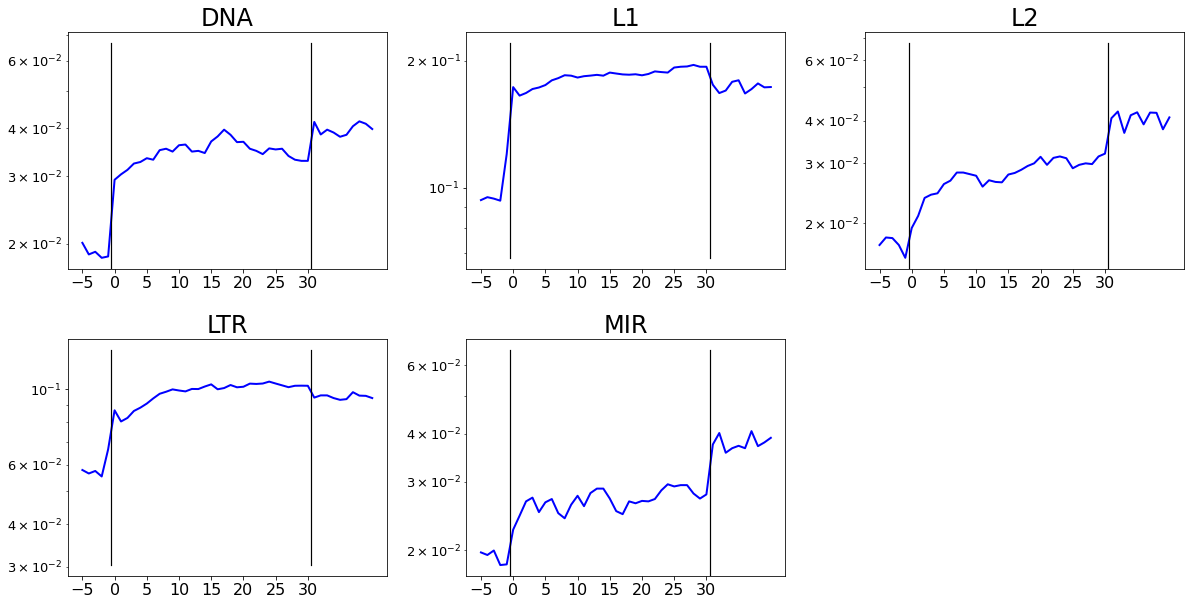

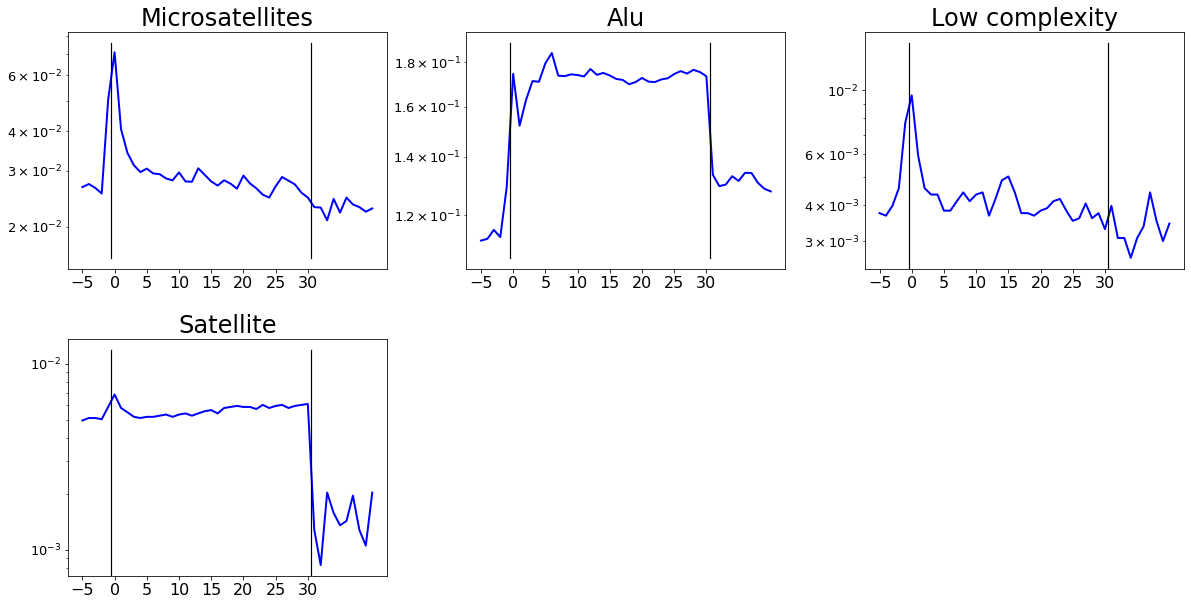

In [5]:
import matplotlib.pyplot as plt


def plot_shifts_repeats(dfs, col_name, ax_in, sides, comp1="all", comp2="all", col_in="blue"):
    arr = np.array([])
    for df in dfs:
        if comp1 == "noNs":
            df = df[df["gaps"] == 0]
        
        if comp2 == "small":
            df = df[df["jumps"] == 1]
        elif comp2 == "big":
            df = df[df["jumps"] > 3]
        arr = np.append(arr, sum(df[col_name])/(2*len(df[col_name])))
    ax_in.plot(range(-5, len(arr)-5), arr, '-', color=col_in, linewidth=2)
    ax_in.plot([-0.5, -0.5], [min(arr)-sides, max(arr)+sides], color='k', linewidth=1.2, label='_nolegend_')
    ax_in.plot([30.5, 30.5], [min(arr)-sides, max(arr)+sides], color='k', linewidth=1.2, label='_nolegend_')
    
def plot_several_repeats(repeat_names, titles, subplots_size, figure_size, sides, comp1="all", comp2="all"):
    fig, axs = plt.subplots(subplots_size[0], subplots_size[1], figsize=figure_size)
    fig.subplots_adjust(hspace=.3)
    fig.subplots_adjust(wspace=.25)
    for i, ax in enumerate(axs.flat):
        if i >= len(repeat_names):
            ax.axis('off')
        else:
            ax.set_yscale('log')
            ax.set_title(titles[i], fontsize=24)
            ax.set_xticks([-5, 0, 5, 10, 15, 20, 25, 30])
            ax.tick_params(axis='x', labelsize=16)
            ax.tick_params(axis='y', labelsize=13, which="both")
            plot_shifts_repeats(pieces, repeat_names[i], ax, sides, comp1=comp1, comp2=comp2, col_in="b")
    fig.show()

#yticks_from_outside = [None, None, [0.01, 0.05], None, None]
titles = ["DNA", "L1", "L2", "LTR", "MIR"]
plot_several_repeats(["DNA", "L1", "L2", "LTR", "MIR"], titles, (2,3), (20,10), 0.025)
#plt.savefig('newer_repeats_1st.pdf')

titles = ["Microsatellites", "Alu", "Low complexity", "Satellite"]
plot_several_repeats(["Simple_repeat", "Alu", "Low_complexity", "Real_satellite"], titles, (2,3), (20,10), 0.005)


# Predicting features affecting duplication rates

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

X, y = np.array(piece_out.iloc[:, 5:], float), np.array(piece_out["jumps"], float)
clf = RandomForestRegressor(max_depth=5, n_estimators=100, oob_score=True)

for n in range(5):
    strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=n)
    cv_results = cross_val_score(clf, X, y, cv=strat_k_fold)
    print("Mean:", np.mean(cv_results))

#cv_results = cross_validate(clf, X, y, cv=5, scoring="explained_variance")

#print(np.corrcoef(y_pred, y_test))
#print(clf.oob_score_)
#clf.feature_importances_
# 31%

Mean: 0.3146225484340059
Mean: 0.30932869950867947
Mean: 0.3084571525138388
Mean: 0.31422573395625025
Mean: 0.3132037619206991


In [21]:
clf.fit(X, y)
y_pred = clf.predict(X)
print(np.corrcoef(y_pred, y))
print("OOB score:", clf.oob_score_)

[[1.         0.68920139]
 [0.68920139 1.        ]]
OOB score: 0.3148502015164806


In [ ]:
# Long run, change permutation number.
# Try perm = 100. It takes 15 mins per sample per 100 permutations.

import time
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

perm = 100

for pie in [piece_out]:
    start = time.time()
    X, y = np.array(pie.iloc[:, 5:], float), np.array(pie["jumps"], float)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=42, oob_score=True)
    clf.fit(X_train, y_train)
    imp_r = permutation_importance(clf, X_test, y_test)
    imps = np.array([imp_r.importances_mean])

    for i in range(perm):
        np.random.shuffle(y_test)
        np.random.shuffle(y_train)
        clf.fit(X_train, y_train)
        imp_p = permutation_importance(clf, X_test, y_test)
        imps = np.append(imps, [imp_p.importances_mean], axis=0)

    print(imps.shape)
    print((time.time() - start)/60, "mins")
    
    thr = 0.05
    cols = pie.iloc[:,5:].columns
    cols = cols[imps[0] > 0]
    imps2 = imps[:, imps[0] > 0]

    imps_arr = imps2[0] - imps2 < 0
    imps_arr = imps_arr.astype(int)
    pvals = np.sum(imps_arr, axis=0)/(imps_arr.shape[0] - 1)
    print(cols)
    print(cols[pvals < thr])
    print(pvals[pvals < thr])

In [7]:
from scipy.stats import spearmanr

for index in range(41,43):
    print(f"{piece_out.columns[index]}:")

    real = abs(spearmanr(piece_out.iloc[:,4], piece_out.iloc[:,index])[0])
    fakes = []
    vec = piece_out.iloc[:,index].copy()
    jumps = piece_out.iloc[:,4].copy()

    for i in range(100):
        np.random.shuffle(vec)
        fakes.append(abs(spearmanr(jumps, vec)[0]))

    fakes = np.array(fakes)
    print(spearmanr(piece_out.iloc[:,4], piece_out.iloc[:,index])[0])
    print(len(fakes[fakes >= real])/len(fakes))

Real_satellite:


/scratch/local/ipykernel_115066/1536820072.py:12: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(vec)


0.03049636404356141
0.02
CG_frac:
0.015951119871467762
0.24


In [8]:
print(piece_out.columns)
piece_out.iloc[:, 4:].corr(method='spearman')

Index(['chr', 'coor_s', 'coor_e', 'ids', 'jumps', 'length', 'centro', 'telo',
       'gaps', 'genes', 'intra_frac', 'cpgisl_in', 'cpgisl_bor', 'ctcf',
       'repli_in', 'repli_bor', 'repli_bor_deriv', 'repli_deriv', 'recomb_in',
       'recomb_bor', 'dnase_in', 'dnase_bor', 'CG_frac_in', 'DNA', 'LINE',
       'LTR', 'SINE', 'Low_complexity', 'Retroposon', 'Satellite',
       'Simple_repeat', 'rRNA', 'snRNA', 'scRNA', 'srpRNA', 'tRNA', 'RC', 'L1',
       'L2', 'MIR', 'Alu', 'Real_satellite', 'CG_frac', 'telocent_dist'],
      dtype='object')


,jumps,length,centro,telo,gaps,genes,intra_frac,cpgisl_in,cpgisl_bor,ctcf,repli_in,repli_bor,repli_bor_deriv,repli_deriv,recomb_in,recomb_bor,dnase_in,dnase_bor,CG_frac_in,DNA,LINE,LTR,SINE,Low_complexity,Retroposon,Satellite,Simple_repeat,rRNA,snRNA,scRNA,srpRNA,tRNA,RC,L1,L2,MIR,Alu,Real_satellite,CG_frac,telocent_dist
jumps,1.000000,0.279212,-0.093086,0.025453,0.143827,0.104412,-0.139751,0.242378,-0.001322,-0.018086,0.011305,0.019057,-0.033792,0.129046,-0.034103,-0.034268,0.027974,0.019482,0.022664,-0.000165,0.031013,0.015526,0.056694,-0.001160,0.023545,0.065047,0.060435,0.004722,0.033917,NaN,0.022911,-0.006797,NaN,0.033059,-0.010767,-0.019090,0.066427,0.030496,0.015951,-0.061421
length,0.279212,1.000000,-0.223031,-0.041744,0.238819,0.181068,0.093993,0.397722,-0.017348,-0.020418,0.036844,0.045895,-0.054321,0.174280,-0.011165,-0.011243,0.105848,0.013764,0.000695,-0.005739,0.088312,0.105718,0.182280,-0.015335,0.022474,0.150703,-0.034912,0.018455,0.015209,NaN,0.030678,-0.018581,NaN,0.094298,0.007695,0.002154,0.194188,0.088141,0.163416,-0.246666
centro,-0.093086,-0.223031,1.000000,-0.284394,-0.112459,0.051749,-0.018237,-0.080382,0.032646,0.020481,0.016515,0.014034,0.081771,-0.073142,0.161249,0.161432,-0.022435,-0.027742,0.114910,0.016699,-0.049629,-0.027497,-0.090918,0.000372,-0.026934,-0.151260,-0.003887,0.007752,-0.013819,NaN,0.001597,-0.004807,NaN,-0.057896,0.010048,0.029265,-0.108365,-0.042786,0.015430,0.438001
telo,0.025453,-0.041744,-0.284394,1.000000,-0.071471,-0.047382,-0.084454,-0.082714,-0.068271,-0.021537,-0.138307,-0.136010,-0.029274,-0.007201,-0.450424,-0.450467,0.014834,0.046199,-0.250067,0.015709,0.072405,-0.016624,-0.036334,0.003894,0.021352,0.018874,-0.000572,-0.015195,0.015607,NaN,-0.011518,-0.007429,NaN,0.067156,0.019280,-0.012761,-0.034102,0.008442,-0.228305,0.511343
gaps,0.143827,0.238819,-0.112459,-0.071471,1.000000,0.049167,-0.049177,0.226155,-0.008990,-0.021565,0.042084,0.055482,-0.115729,0.142636,0.023537,0.023574,0.050936,0.047241,-0.012624,-0.028305,-0.030202,-0.007765,-0.049021,-0.017142,-0.015688,0.117338,0.014183,0.105283,-0.006667,NaN,0.038369,-0.002107,NaN,-0.020684,-0.024319,-0.018771,-0.043722,0.040900,0.120645,-0.169767
genes,0.104412,0.181068,0.051749,-0.047382,0.049167,1.000000,0.001483,0.298337,0.043888,-0.002631,0.125311,0.130798,0.064849,0.122314,0.031236,0.031202,0.055992,-0.007949,0.068593,-0.002465,-0.066758,-0.088781,0.015267,-0.028456,0.004753,-0.063194,-0.059002,-0.004831,0.012725,NaN,0.002098,-0.012868,NaN,-0.075396,0.014606,0.004317,0.015257,-0.031522,0.058384,0.028232
intra_frac,-0.139751,0.093993,-0.018237,-0.084454,-0.049177,0.001483,1.000000,0.030797,0.008072,0.007940,0.011505,0.010635,0.020619,0.009684,0.016009,0.016156,0.006520,-0.006015,0.133034,0.004928,0.000902,0.039459,0.120452,-0.024509,0.003460,-0.055815,-0.051537,-0.001426,-0.005373,NaN,-0.000056,-0.019200,NaN,0.003388,0.004778,0.026883,0.120000,-0.020645,0.163175,-0.111089
cpgisl_in,0.242378,0.397722,-0.080382,-0.082714,0.226155,0.298337,0.030797,1.000000,0.368616,-0.014072,0.079447,0.088496,-0.007088,0.219407,0.022456,0.022249,0.094577,0.007974,0.276685,-0.024285,-0.020694,0.003057,0.073212,0.006438,0.024863,0.071862,-0.004422,0.050464,0.012101,NaN,0.026698,-0.005796,NaN,-0.018168,-0.007388,-0.025348,0.086188,0.036276,0.239127,-0.163062
cpgisl_bor,-0.001322,-0.017348,0.032646,-0.068271,-0.008990,0.043888,0.008072,0.368616,1.000000,0.010540,0.011495,0.011860,-0.002225,-0.000737,0.038024,0.037230,-0.004006,-0.006284,0.172827,-0.041961,-0.078255,-0.054164,-0.064385,0.009682,-0.002396,-0.013441,-0.001829,-0.006748,0.011327,NaN,-0.004416,-0.002549,NaN,-0.073556,-0.028927,-0.018077,-0.059718,-0.015103,0.218794,-0.055569
ctcf,-0.018086,-0.020418,0.020481,-0.021537,-0.021565,-0.002631,0.007940,-0.014072,0.010540,1.000000,0.095801,0.094590,0.058683,-0.026007,0.014345,0.014364,0.096867,0.033267,0.033530,0.010469,-0.001721,-0.018872,0.001499,-0.007688,-0.003547,0.006339,-0.002151,-0.005157,0.043864,NaN,-0.003375,-0.001948,NaN,

In [33]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from pingouin import partial_corr

df_in = piece_out.iloc[:, 4:]
df_in = df_in.drop(['telocent_dist', 'Retroposon', 'scRNA', 'RC', 'snRNA', 'srpRNA', 'tRNA', 'rRNA', 'LINE', 'SINE', 'Satellite'], axis=1)
cols = list(df_in.columns)

for i, val in enumerate(cols[1:]):
    other = cols[1:i+1] + cols[i+2:]
    cor = partial_corr(data=df_in, x='jumps', y=val, covar=other, method='spearman')
    print(f"{val}, {cor.r[0]}, {cor['p-val'][0]}, {'yes' if cor['p-val'][0] < 0.01/len(cols[1:]) else ''}")
    
#  length: 0.355, intra_frac: -0.087, cpgisl_in: 0.143, cpgisl_bor: -0.083, repli_deriv: 0.057
#  DNA: -0.081, LTR: -0.075, Retroposon: 0.144, Simple_repeat: 0.105, L1: -0.05, L2: -0.155
#  MIR: -0.16

length, 0.17889013443494833, 8.554957440664577e-49, yes
centro, -0.017033291813847194, 0.16554331476640533, 
telo, 0.01938050387578065, 0.11461490197123515, 
gaps, 0.045744406567497384, 0.00019477649760678663, yes
genes, 0.022597832850987022, 0.06580150272101501, 
intra_frac, -0.1652848813755792, 8.139960317175402e-42, yes
cpgisl_in, 0.12199558340376697, 2.102189618824792e-23, yes
cpgisl_bor, -0.044150510575039915, 0.00032345671078390023, yes
ctcf, -0.00530707378522253, 0.6657294561125363, 
repli_in, -0.03265927683822254, 0.007830719990224735, 
repli_bor, 0.032404221449519544, 0.008327272750832872, 
repli_bor_deriv, 0.0013592532497150478, 0.9118956616540396, 
repli_deriv, 0.05044883537642897, 3.968273306497212e-05, yes
recomb_in, 0.012952015486728497, 0.29170840561583244, 
recomb_bor, -0.013234658547579135, 0.2813050488320786, 
dnase_in, -0.022648101221816753, 0.06520251839121181, 
dnase_bor, 0.017223669028797323, 0.16086514759719125, 
CG_frac_in, 0.028555769780620396, 0.02007150730107

# Enrichment at SD breakpoints

In [12]:
import scipy.stats

ms, stds, vals, labels, colors = np.array([]), np.array([]), np.array([]), np.array([]), np.array([])

cg_frac = piece_out.pop('CG_frac')
piece_out.insert(23, 'CG_frac', cg_frac)
cols = np.array(piece_out.columns[8:])
cols = list(filter(lambda x: not x in ["intra_frac", "Retroposon", "Satellite", "rRNA", 
                                "snRNA", "scRNA", "srpRNA", "tRNA", "RC", "telocent_dist"], cols))

for colname in cols:
    val = np.mean(piece_out[colname])/2
    m_vs = [np.mean(pie.loc[(pie["CG_frac"] != -1) & (pie["CG_frac_in"] != -1), colname])/2 for pie in pieces[-10:]]
    m_v = np.mean(m_vs)
    std_v = np.std(m_vs)
    ci_small, ci1, ci2, ci_large = scipy.stats.norm.ppf([0.001, .01, .99, 0.999], m_v, std_v) 
    if val > ci2:
        colors = np.append(colors, "r")
        if val > ci_large:
            print(f"{colname}, (sign. more): {val} {ci2}")
        else:
            print(f"{colname}, more: {val} {ci2}")
    elif val < ci1:
        colors = np.append(colors, "b")
        if val < ci_small:
            print(f"{colname}, (sign. less): {val} {ci1}")
        else:
            print(f"{colname}, less: {val} {ci1}")
    else:
        print(f"{colname}, NOTHING")
        continue
    ms = np.append(ms, m_v)
    stds = np.append(stds, std_v)
    vals = np.append(vals, val)
    labels = np.append(labels, colname)

gaps, (sign. more): 0.018780048076923076 0.0038866066033907956
genes, (sign. more): 0.3742487980769231 0.35040039237508497
cpgisl_in, (sign. more): 0.19343449519230768 0.13816059674564374
cpgisl_bor, NOTHING
ctcf, (sign. less): 0.012469951923076924 0.018060527366707355
repli_in, (sign. more): 10.491226862980769 9.051748121466197
repli_bor, (sign. more): 10.549169546274037 9.046374319258666
repli_bor_deriv, (sign. more): 0.265625 0.24466198326341995
repli_deriv, (sign. more): 1.9424789663461535 1.7478656747912322
recomb_in, (sign. less): 0.6529491436298078 0.6627314359703362
recomb_bor, (sign. less): 0.65291796875 0.6627264130217713
dnase_in, NOTHING
dnase_bor, NOTHING
CG_frac_in, (sign. more): 0.21922881610576922 0.20899084416570932
CG_frac, (sign. less): 0.2046494891826923 0.2070179586485584
DNA, (sign. less): 0.029371995192307692 0.03882851679479135
LINE, (sign. less): 0.19621394230769232 0.22074887725681983
LTR, (sign. less): 0.08668870192307693 0.09674916817779475
SINE, (sign. more

['gaps' 'genes' 'CpG islands (in)' 'ctcf' 'repli timing (in)'
 'repli timing (bor)' 'repli pausing (bor)' 'repli pausing (in)'
 'recombination (in)' 'recombination (bor)' 'CG frac (in)' 'CG frac (bor)'
 'DNA' 'LINE' 'LTR' 'SINE' 'low complexity' 'microsatellites' 'L2' 'MIR'
 'Alu' 'satellites']


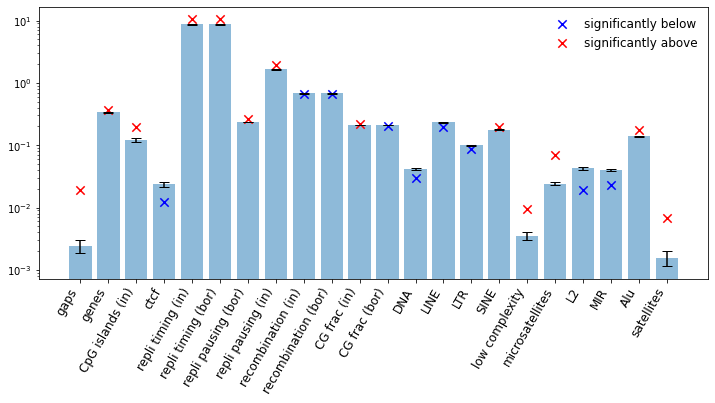

In [21]:
import matplotlib.pyplot as plt

x_pos = np.array(range(len(ms)))

fig, ax = plt.subplots(figsize=(12,5))
ax.bar(x_pos, ms, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=5, width=0.8)
ax.scatter(x_pos[colors == "b"], vals[colors == "b"], color="b", marker="x", s=70)
ax.scatter(x_pos[colors == "r"], vals[colors == "r"], color="r", marker="x", s=70)
ax.set_yscale('log')
ax.set_xticks(x_pos)

indices_change = [2, 4, 5, 6, 7, 8, 9, 10, 11, 16, 17, 21]
new_labels = ["CpG islands (in)", "repli timing (in)", "repli timing (bor)",
              "repli pausing (bor)", "repli pausing (in)", "recombination (in)",
              "recombination (bor)", "CG frac (in)", "CG frac (bor)",
              "low complexity", "microsatellites", "satellites"]

for i in range(len(indices_change)):
    labels[indices_change[i]] = new_labels[i]

ax.set_xticklabels(labels, rotation=60, fontsize=12, ha="right")
ax.legend(['significantly below', 'significantly above'], frameon=False, fontsize=12)
print(labels)